# <center> Série Temporal com Covid-19 </center>
## Professor: Victor Venites
## Estudante: Vinicius Antunes
## Data: 13/04/2020
## Aula: Especial 04

## 1. Importando as Bibliotecas de Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## 2. Carregando as bases de Dados
- Você pode usar comandos do prompt de comando direto no jupyter

In [2]:
confirmados = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=',')
confirmados

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,8,8,10,14,16,17,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,1,1,2,2,3,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,4,4,4,4,4,4,4
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,4,4,4,4,4,4


In [3]:
mortes = pd.read_csv('time_series_covid19_deaths_global.csv', sep=',')
mortes

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,6,6,7,7,11,14,14,15,15,18
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,16,17,20,20,21,22,22,23,23,23
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,86,105,130,152,173,193,205,235,256,275
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15,16,17,18,21,22,23,25,26,26
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
recuperados = pd.read_csv('time_series_covid19_recovered_global.csv', sep=',')
recuperados

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,10,10,10,15,18,18,29,32,32,32
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,76,89,99,104,116,131,154,165,182,197
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,61,62,90,90,90,113,237,347,405,460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,10,16,21,26,31,39,52,58,71,71
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Análise Exploratória

In [5]:
confirmados.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,3838.886364,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515,6710.280303
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,19711.027486,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667,37520.876709
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,20.000000,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000,33.750000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,172.500000,183.000000,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000,265.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,873.000000,943.000000,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000,1305.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,243762.000000,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000


In [6]:
mortes.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,0.064394,0.068182,0.098485,0.159091,0.212121,0.310606,0.496212,0.503788,...,200.693182,222.678030,244.719697,262.780303,282.443182,310.094697,334.613636,361.571970,388.352273,410.996212
std,24.734994,70.669996,1.046278,1.047853,1.479183,2.462894,3.201783,4.678456,7.693263,7.693757,...,1214.417299,1323.622793,1432.168421,1521.482461,1620.151924,1757.472055,1881.696578,2019.835839,2162.976556,2289.544937
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.500000,4.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,13.000000,16.250000,18.000000,19.000000,21.250000,22.000000,23.000000,24.000000,24.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,13915.000000,14681.000000,15362.000000,15887.000000,16523.000000,17127.000000,17669.000000,18279.000000,18849.000000,20463.000000


In [7]:
recuperados.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
count,250.000000,250.000000,250.000000,250.000000,250.0000,250.00000,250.00000,250.00000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,20.048575,27.934869,0.112000,0.120000,0.1440,0.15600,0.20800,0.24400,0.428000,0.504000,...,841.052000,903.184000,984.608000,1040.048000,1106.060000,1200.216000,1314.644000,1415.900000,1504.384000,1608.440000
std,24.394560,67.432156,1.770875,1.774881,1.9664,2.03278,2.66555,2.86939,5.090034,5.599231,...,4907.434102,5098.780571,5338.962605,5546.156825,5742.144926,6105.529052,6634.364417,7057.018413,7368.006518,7796.138801
min,-51.796300,-106.346800,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-8.091400,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,5.000000
50%,21.805100,22.380900,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,18.000000,21.000000,24.500000,28.000000,33.000000,39.500000,40.000000,47.500000,53.000000,58.000000
75%,39.376275,87.379325,0.000000,0.000000,0.0000,0.00000,0.00000,0.00000,0.000000,0.000000,...,109.750000,127.000000,131.000000,141.750000,162.000000,173.000000,202.750000,249.000000,278.750000,296.500000
max,71.706900,178.065000,28.000000,28.000000,31.0000,32.00000,42.00000,45.00000,80.000000,88.000000,...,63471.000000,63612.000000,63762.000000,63945.000000,64014.000000,64073.000000,64142.000000,64187.000000,64236.000000,64264.000000


## 4. Juntando tudo em 1 série Temporal

In [8]:
serie_temporal_confirmados = confirmados.copy()
serie_temporal_confirmados.drop(columns=['Province/State', 'Country/Region','Lat', 'Long'], inplace=True)
serie_temporal_confirmados.iloc[:3, :3]

,1/22/20,1/23/20,1/24/20
0,0,0,0
1,0,0,0
2,0,0,0


In [9]:
serie_temporal_mortes = mortes.copy()
serie_temporal_mortes.drop(columns=['Province/State', 'Country/Region','Lat', 'Long'], inplace=True)
serie_temporal_mortes.iloc[:3, :3]

,1/22/20,1/23/20,1/24/20
0,0,0,0
1,0,0,0
2,0,0,0


In [10]:
serie_temporal_recuperados = confirmados.copy()
serie_temporal_recuperados.drop(columns=['Province/State', 'Country/Region','Lat', 'Long'], inplace=True)
serie_temporal_recuperados.iloc[:3, :3]

,1/22/20,1/23/20,1/24/20
0,0,0,0
1,0,0,0
2,0,0,0


In [11]:
serie_geral_confirmados = serie_temporal_confirmados.sum().copy()
serie_geral_confirmados = pd.DataFrame(serie_geral_confirmados)
serie_geral_confirmados.rename(columns={0: 'Casos_Confirmados'}, inplace=True)
serie_geral_confirmados.head(5)

,Casos_Confirmados
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118


In [12]:
serie_geral_mortes = serie_temporal_mortes.sum().copy()
serie_geral_mortes = pd.DataFrame(serie_geral_mortes)
serie_geral_mortes.rename(columns={0: 'Mortes_Confirmadas'}, inplace=True)
serie_geral_mortes.head(5)

,Mortes_Confirmadas
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56


In [13]:
serie_geral_recuperados = serie_temporal_recuperados.sum().copy()
serie_geral_recuperados = pd.DataFrame(serie_geral_recuperados)
serie_geral_recuperados.rename(columns={0: 'Casos_Recuperados'}, inplace=True)
serie_geral_recuperados.head(5)

,Casos_Recuperados
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118


## 5. Todos a Partir do Tempo 0

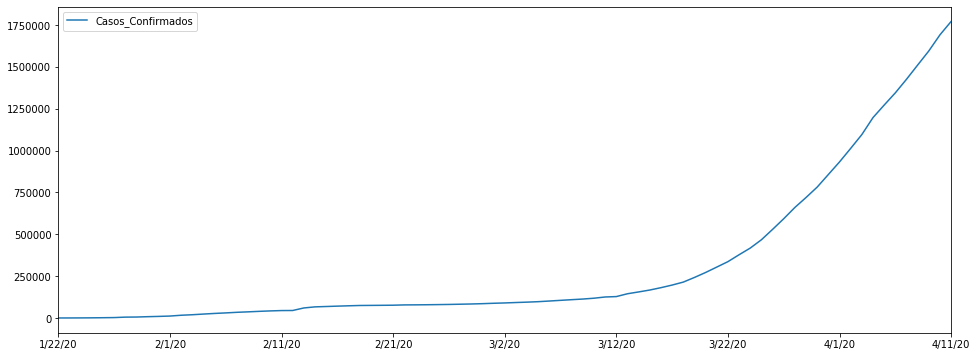

In [14]:
serie_geral_confirmados.plot(figsize=(16, 6))
plt.show()

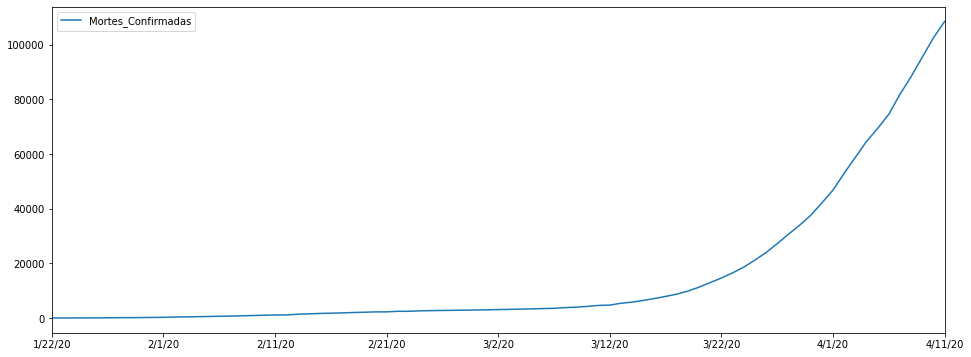

In [15]:
serie_geral_mortes.plot(figsize=(16, 6))
plt.show()

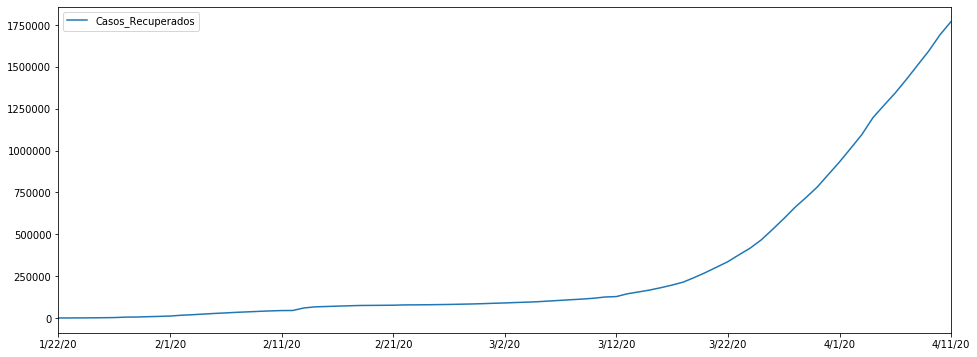

In [16]:
serie_geral_recuperados.plot(figsize=(16, 6))
plt.show()

In [17]:
serie_geral_confirmados.index = pd.to_datetime(serie_geral_confirmados.index)
serie_geral_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-01-22 to 2020-04-11
Data columns (total 1 columns):
Casos_Confirmados    81 non-null int64
dtypes: int64(1)
memory usage: 1.3 KB


In [18]:
serie_geral_mortes.index = pd.to_datetime(serie_geral_mortes.index)
serie_geral_mortes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-01-22 to 2020-04-11
Data columns (total 1 columns):
Mortes_Confirmadas    81 non-null int64
dtypes: int64(1)
memory usage: 1.3 KB


In [19]:
serie_geral_recuperados.index = pd.to_datetime(serie_geral_recuperados.index)
serie_geral_recuperados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-01-22 to 2020-04-11
Data columns (total 1 columns):
Casos_Recuperados    81 non-null int64
dtypes: int64(1)
memory usage: 1.3 KB


In [20]:
tempos = list(range(serie_geral_confirmados.shape[0]))
serie_geral_confirmados['Tempos'] = tempos
serie_geral_confirmados['Dia'] = serie_geral_confirmados.index.day
serie_geral_confirmados['Dia da semana'] = serie_geral_confirmados.index.dayofweek
serie_geral_confirmados['Mes'] = serie_geral_confirmados.index.month

# 0 é a Segunda
serie_geral_confirmados.head(5)

,Casos_Confirmados,Tempos,Dia,Dia da semana,Mes
2020-01-22,555,0,22,2,1
2020-01-23,654,1,23,3,1
2020-01-24,941,2,24,4,1
2020-01-25,1434,3,25,5,1
2020-01-26,2118,4,26,6,1


In [21]:
tempos = list(range(serie_geral_mortes.shape[0]))
serie_geral_mortes['Tempos'] = tempos
serie_geral_mortes['Dia'] = serie_geral_mortes.index.day
serie_geral_mortes['Dia da semana'] = serie_geral_mortes.index.dayofweek
serie_geral_mortes['Mes'] = serie_geral_mortes.index.month

# 0 é a Segunda
serie_geral_mortes.head(5)

,Mortes_Confirmadas,Tempos,Dia,Dia da semana,Mes
2020-01-22,17,0,22,2,1
2020-01-23,18,1,23,3,1
2020-01-24,26,2,24,4,1
2020-01-25,42,3,25,5,1
2020-01-26,56,4,26,6,1


In [22]:
tempos = list(range(serie_geral_recuperados.shape[0]))
serie_geral_recuperados['Tempos'] = tempos
serie_geral_recuperados['Dia'] = serie_geral_recuperados.index.day
serie_geral_recuperados['Dia da semana'] = serie_geral_recuperados.index.dayofweek
serie_geral_recuperados['Mes'] = serie_geral_recuperados.index.month

# 0 é a Segunda
serie_geral_recuperados.head(5)

,Casos_Recuperados,Tempos,Dia,Dia da semana,Mes
2020-01-22,555,0,22,2,1
2020-01-23,654,1,23,3,1
2020-01-24,941,2,24,4,1
2020-01-25,1434,3,25,5,1
2020-01-26,2118,4,26,6,1


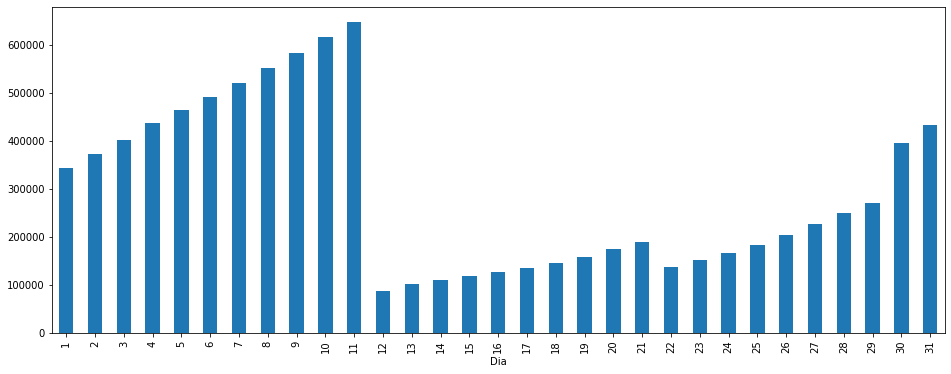

In [23]:
serie_geral_confirmados.groupby('Dia')['Casos_Confirmados'].mean().plot.bar(figsize=(16, 6))

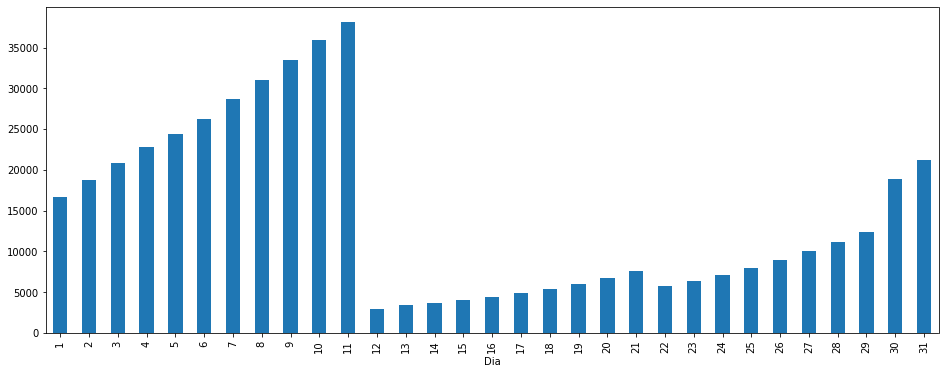

In [24]:
serie_geral_mortes.groupby('Dia')['Mortes_Confirmadas'].mean().plot.bar(figsize=(16, 6))

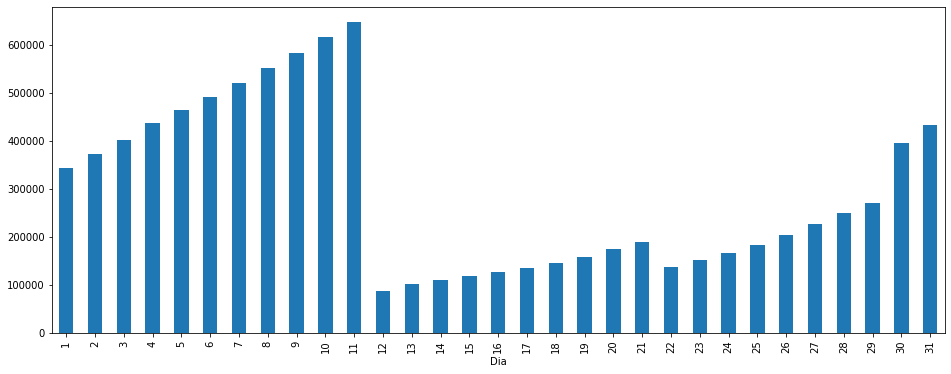

In [25]:
serie_geral_recuperados.groupby('Dia')['Casos_Recuperados'].mean().plot.bar(figsize=(16, 6))

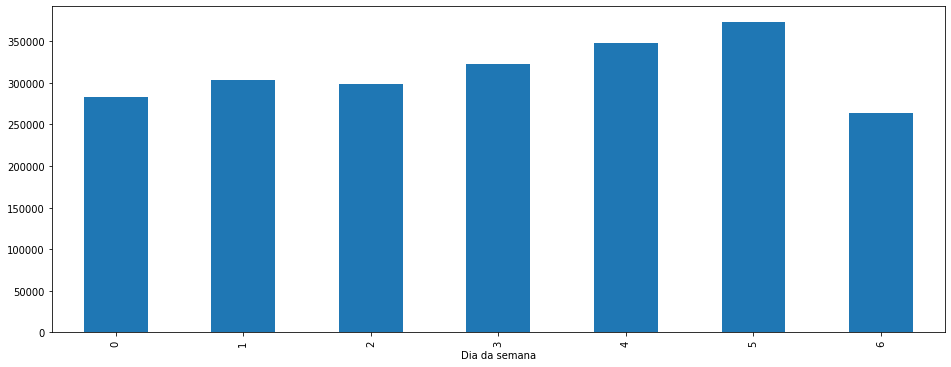

In [26]:
serie_geral_confirmados.groupby('Dia da semana')['Casos_Confirmados'].mean().plot.bar(figsize=(16, 6))

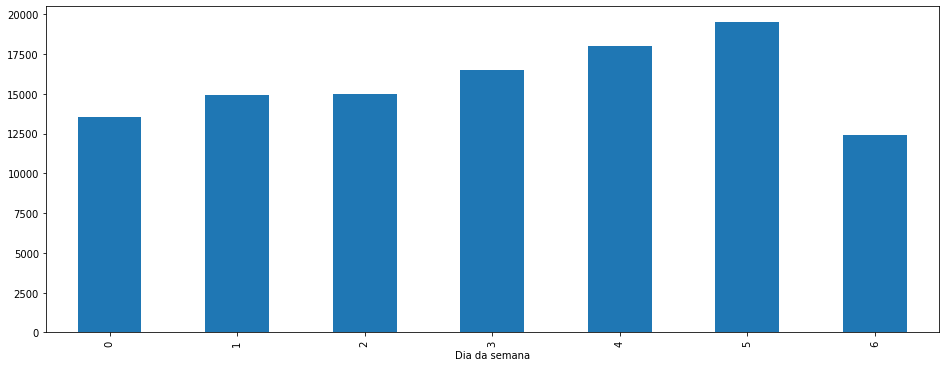

In [27]:
serie_geral_mortes.groupby('Dia da semana')['Mortes_Confirmadas'].mean().plot.bar(figsize=(16, 6))

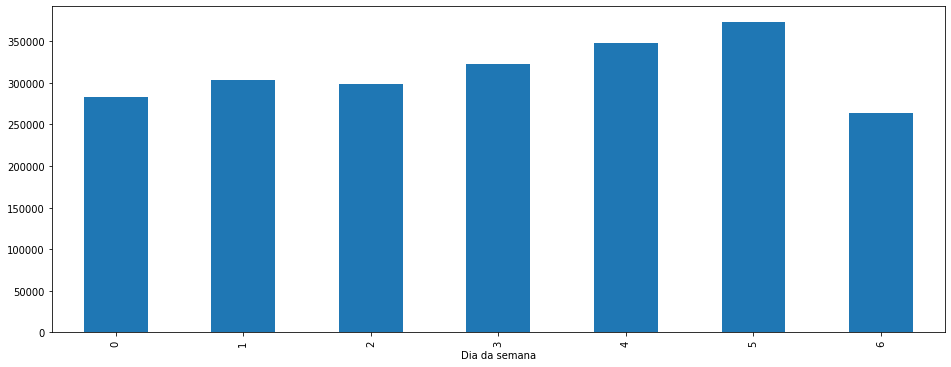

In [28]:
serie_geral_recuperados.groupby('Dia da semana')['Casos_Recuperados'].mean().plot.bar(figsize=(16, 6))

In [29]:
dummies_dia_semana = pd.get_dummies(serie_geral_confirmados['Dia da semana'])
serie_geral_confirmados = pd.concat([serie_geral_confirmados, dummies_dia_semana], axis=1)
dias_semana = {1: 'Segunda-feira', 2: "Terça-feira", 
               3: 'Quarta-feira', 4: 'Quinta-feira',
               5: 'Sexta-feira', 6:'Sabado',
               0: 'Domingo'}
serie_geral_confirmados.rename(columns=dias_semana, inplace=True)
dummies_dia = pd.get_dummies(serie_geral_confirmados['Dia'])
serie_geral_confirmados = pd.concat([serie_geral_confirmados, dummies_dia], axis=1)
serie_geral_confirmados.head()

,Casos_Confirmados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,22,23,24,25,26,27,28,29,30,31
2020-01-22,555,0,22,2,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2020-01-23,654,1,23,3,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-24,941,2,24,4,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-01-25,1434,3,25,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-26,2118,4,26,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
dummies_dia_semana = pd.get_dummies(serie_geral_mortes['Dia da semana'])
serie_geral_mortes = pd.concat([serie_geral_mortes, dummies_dia_semana], axis=1)
dias_semana = {1: 'Segunda-feira', 2: "Terça-feira", 
               3: 'Quarta-feira', 4: 'Quinta-feira',
               5: 'Sexta-feira', 6:'Sabado',
               0: 'Domingo'}
serie_geral_mortes.rename(columns=dias_semana, inplace=True)
dummies_dia = pd.get_dummies(serie_geral_mortes['Dia'])
serie_geral_mortes = pd.concat([serie_geral_mortes, dummies_dia], axis=1)
serie_geral_mortes.head()

,Mortes_Confirmadas,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,22,23,24,25,26,27,28,29,30,31
2020-01-22,17,0,22,2,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2020-01-23,18,1,23,3,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-24,26,2,24,4,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-01-25,42,3,25,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-26,56,4,26,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
dummies_dia_semana = pd.get_dummies(serie_geral_recuperados['Dia da semana'])
serie_geral_recuperados = pd.concat([serie_geral_recuperados, dummies_dia_semana], axis=1)
dias_semana = {1: 'Segunda-feira', 2: "Terça-feira", 
               3: 'Quarta-feira', 4: 'Quinta-feira',
               5: 'Sexta-feira', 6:'Sabado',
               0: 'Domingo'}
serie_geral_recuperados.rename(columns=dias_semana, inplace=True)
dummies_dia = pd.get_dummies(serie_geral_recuperados['Dia'])
serie_geral_recuperados = pd.concat([serie_geral_recuperados, dummies_dia], axis=1)
serie_geral_recuperados.head()

,Casos_Recuperados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,22,23,24,25,26,27,28,29,30,31
2020-01-22,555,0,22,2,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2020-01-23,654,1,23,3,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-24,941,2,24,4,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-01-25,1434,3,25,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-26,2118,4,26,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
serie_geral_confirmados['Anterior'] = serie_geral_confirmados['Casos_Confirmados'].shift(5)
serie_geral_confirmados = serie_geral_confirmados.iloc[5:]

In [33]:
serie_geral_mortes['Anterior'] = serie_geral_mortes['Mortes_Confirmadas'].shift(5)
serie_geral_mortes = serie_geral_confirmados.iloc[5:]

In [34]:
serie_geral_recuperados['Anterior'] = serie_geral_recuperados['Casos_Recuperados'].shift(5)
serie_geral_recuperados.iloc[5:]

,Casos_Recuperados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,23,24,25,26,27,28,29,30,31,Anterior
2020-01-27,2927,5,27,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,555.0
2020-01-28,5578,6,28,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,654.0
2020-01-29,6166,7,29,2,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,941.0
2020-01-30,8234,8,30,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1434.0
2020-01-31,9927,9,31,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07,1426096,76,7,1,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1013466.0
2020-04-08,1511104,77,8,2,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1095917.0
2020-04-09,1595350,78,9,3,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1197408.0
2020-04-10,1691719,79,10,4,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1272115.0


## 6. Previsão por Soma Cumulativa

In [35]:
serie_geral_confirmados.shape

(76, 44)

In [36]:
serie_geral_mortes.shape

(71, 44)

In [37]:
serie_geral_recuperados.shape

(81, 44)

In [38]:
serie_geral_confirmados.corr().round(3)[:6]

,Casos_Confirmados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,23,24,25,26,27,28,29,30,31,Anterior
Casos_Confirmados,1.000,0.802,-0.163,0.046,0.784,-0.046,-0.028,-0.008,0.015,0.039,...,-0.037,-0.030,-0.021,-0.010,-0.047,-0.037,-0.028,0.021,0.035,0.994
Tempos,0.802,1.000,-0.046,0.058,0.927,-0.047,-0.028,-0.009,0.009,0.028,...,0.030,0.037,0.045,0.052,-0.066,-0.057,-0.048,-0.034,-0.026,0.779
Dia,-0.163,-0.046,1.000,-0.057,-0.418,0.007,0.051,-0.029,0.015,0.059,...,0.141,0.159,0.177,0.195,0.262,0.284,0.306,0.266,0.283,-0.190
Dia da semana,0.046,0.058,-0.057,1.000,0.073,-0.614,-0.407,-0.199,0.008,0.216,...,0.003,-0.204,-0.121,-0.038,-0.064,0.038,0.140,-0.121,-0.038,0.047
Mes,0.784,0.927,-0.418,0.073,1.000,-0.044,-0.044,0.002,0.002,0.002,...,-0.027,-0.027,-0.027,-0.027,-0.158,-0.158,-0.158,-0.128,-0.128,0.773
Domingo,-0.046,-0.047,0.007,-0.614,-0.044,1.000,-0.169,-0.169,-0.169,-0.169,...,0.166,0.166,-0.068,-0.068,0.109,-0.083,-0.083,0.166,-0.068,-0.052


In [39]:
serie_geral_mortes.corr().round(3)[:6]

,Casos_Confirmados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,23,24,25,26,27,28,29,30,31,Anterior
Casos_Confirmados,1.000,0.814,-0.098,0.023,0.825,-0.040,-0.021,-0.000,0.024,0.050,...,-0.046,-0.039,-0.030,-0.019,-0.007,0.005,0.016,0.107,0.126,0.994
Tempos,0.814,1.000,0.151,-0.000,0.913,-0.030,-0.010,0.010,0.030,0.049,...,0.012,0.021,0.029,0.037,0.046,0.054,0.062,0.134,0.140,0.789
Dia,-0.098,0.151,1.000,-0.015,-0.264,-0.002,0.044,-0.053,-0.007,0.040,...,0.174,0.193,0.212,0.232,0.251,0.271,0.290,0.217,0.231,-0.129
Dia da semana,0.023,-0.000,-0.015,1.000,0.005,-0.613,-0.411,-0.208,-0.006,0.197,...,-0.002,-0.215,-0.130,-0.045,0.040,0.125,0.210,-0.181,-0.121,0.024
Mes,0.825,0.913,-0.264,0.005,1.000,-0.027,-0.027,0.031,0.031,0.031,...,-0.059,-0.059,-0.059,-0.059,-0.059,-0.059,-0.059,0.043,0.043,0.812
Domingo,-0.040,-0.030,-0.002,-0.613,-0.027,1.000,-0.164,-0.164,-0.164,-0.164,...,0.176,0.176,-0.069,-0.069,-0.069,-0.069,-0.069,0.295,-0.048,-0.047


In [40]:
serie_geral_recuperados.corr().round(3)[:6]

,Casos_Recuperados,Tempos,Dia,Dia da semana,Mes,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,...,23,24,25,26,27,28,29,30,31,Anterior
Casos_Recuperados,1.000,0.791,-0.197,0.022,0.769,-0.027,-0.009,-0.014,0.007,0.030,...,-0.069,-0.063,-0.056,-0.047,-0.038,-0.027,-0.019,0.028,0.041,0.994
Tempos,0.791,1.000,-0.138,0.001,0.940,0.000,0.017,-0.027,-0.009,0.009,...,-0.073,-0.064,-0.056,-0.048,-0.039,-0.031,-0.022,-0.014,-0.007,0.779
Dia,-0.197,-0.138,1.000,-0.018,-0.468,-0.017,0.026,-0.026,0.019,0.064,...,0.157,0.179,0.200,0.221,0.242,0.264,0.285,0.248,0.265,-0.190
Dia da semana,0.022,0.001,-0.018,1.000,0.007,-0.609,-0.408,-0.217,-0.005,0.207,...,-0.002,-0.135,-0.036,0.064,-0.069,0.031,0.130,-0.123,-0.042,0.047
Mes,0.769,0.940,-0.468,0.007,1.000,0.007,0.007,-0.015,-0.015,-0.015,...,-0.119,-0.119,-0.119,-0.119,-0.119,-0.119,-0.119,-0.096,-0.096,0.773
Domingo,-0.027,0.000,-0.017,-0.609,0.007,1.000,-0.157,-0.165,-0.165,-0.165,...,0.113,0.113,-0.078,-0.078,0.113,-0.078,-0.078,0.169,-0.063,-0.052


In [41]:
serie_geral_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2020-01-27 to 2020-04-11
Data columns (total 44 columns):
Casos_Confirmados    76 non-null int64
Tempos               76 non-null int64
Dia                  76 non-null int64
Dia da semana        76 non-null int64
Mes                  76 non-null int64
Domingo              76 non-null uint8
Segunda-feira        76 non-null uint8
Terça-feira          76 non-null uint8
Quarta-feira         76 non-null uint8
Quinta-feira         76 non-null uint8
Sexta-feira          76 non-null uint8
Sabado               76 non-null uint8
1                    76 non-null uint8
2                    76 non-null uint8
3                    76 non-null uint8
4                    76 non-null uint8
5                    76 non-null uint8
6                    76 non-null uint8
7                    76 non-null uint8
8                    76 non-null uint8
9                    76 non-null uint8
10                   76 non-null uint8
11                 

In [42]:
taxa_treino = 0.95
x_treino_confir = serie_geral_confirmados.iloc[:round(serie_geral_confirmados.shape[0] * taxa_treino), 1:]
x_teste_confir = serie_geral_confirmados.iloc[round(serie_geral_confirmados.shape[0] * taxa_treino):, 1:]

y_treino_confir = serie_geral_confirmados.iloc[:round(serie_geral_confirmados.shape[0] * taxa_treino), 0]
y_teste_confir = serie_geral_confirmados.iloc[round(serie_geral_confirmados.shape[0] * taxa_treino):, 0]

In [43]:
taxa_treino = 0.95
x_treino_mort = serie_geral_mortes.iloc[:round(serie_geral_mortes.shape[0] * taxa_treino), 1:]
x_teste_mort = serie_geral_mortes.iloc[round(serie_geral_mortes.shape[0] * taxa_treino):, 1:]

y_treino_mort = serie_geral_mortes.iloc[:round(serie_geral_mortes.shape[0] * taxa_treino), 0]
y_teste_mort = serie_geral_mortes.iloc[round(serie_geral_mortes.shape[0] * taxa_treino):, 0]

In [44]:
taxa_treino = 0.95
x_treino_recup = serie_geral_recuperados.iloc[:round(serie_geral_recuperados.shape[0] * taxa_treino), 1:]
x_teste_recup = serie_geral_recuperados.iloc[round(serie_geral_recuperados.shape[0] * taxa_treino):, 1:]

y_treino_recup = serie_geral_recuperados.iloc[:round(serie_geral_recuperados.shape[0] * taxa_treino), 0]
y_teste_recup = serie_geral_recuperados.iloc[round(serie_geral_recuperados.shape[0] * taxa_treino):, 0]

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
#x_treino_confir, x_teste_confir, y_treino_confir, y_teste_confir
#x_treino_mort, x_teste_mort, y_treino_mort, y_teste_mort
#x_treino_recup, x_teste_recup, y_treino_recup, y_teste_recup

#Modelo para os casos confirmados
modelo_confir = LinearRegression()
modelo_confir.fit(x_treino_confir, y_treino_confir)
r_2_confir = modelo_confir.score(x_treino_confir, y_treino_confir)

#Modelo para as mortes confirmadas
modelo_mort = LinearRegression()
modelo_mort.fit(x_treino_mort, y_treino_mort)
r_2_mort = modelo_mort.score(x_treino_mort, y_treino_mort)

#Modelo para os casos recuperados
#modelo_recup = LinearRegression()
#modelo_recup.fit(x_treino_recup, y_treino_recup)
#r_2_recup = modelo_recup.score(x_treino_recup, y_treino_recup)

print('R² ==> Casos confirmados ==> {}'.format(r_2_confir.round(3)))
print('R² ==> Mortes confirmadas ==> {}'.format(r_2_mort.round(3)))
#print('R² ==> Casos recuperados ==> {}'.format(r_2_recup.round(3)))

R² ==> Casos confirmados ==> 0.993
R² ==> Mortes confirmadas ==> 0.995


## 7. Previsão por Quantidade ao Dia

In [47]:
previsto_confir = modelo_confir.predict(x_teste_confir)
previsto_confir.round()

array([1652907., 1820162., 1947775., 2060523.])

In [48]:
previsto_mort = modelo_mort.predict(x_teste_mort)
previsto_mort.round()

array([1739682., 1955594., 2100123., 2196286.])

In [49]:
#previsto_recup = modelo_recup.predict(x_teste_recup)
#previsto_recup.round()

In [50]:
df_previsao_confir = x_teste_confir.copy()
df_previsao_confir['Casos_confirmados'] = previsto_confir
df_previsao_confir = df_previsao_confir.iloc[:, df_previsao_confir.shape[1]-1]
df_previsao_confir

2020-04-08    1.652907e+06
2020-04-09    1.820162e+06
2020-04-10    1.947775e+06
2020-04-11    2.060523e+06
Name: Casos_confirmados, dtype: float64

In [51]:
df_previsao_mort = x_teste_mort.copy()
df_previsao_mort['Mortes_confirmadas'] = previsto_mort
df_previsao_mort = df_previsao_mort.iloc[:, df_previsao_mort.shape[1]-1]
df_previsao_mort

2020-04-08    1.739682e+06
2020-04-09    1.955594e+06
2020-04-10    2.100123e+06
2020-04-11    2.196286e+06
Name: Mortes_confirmadas, dtype: float64

In [52]:
#df_previsao_recup = x_teste_recup.copy()
#df_previsao_recup['Casos_recuperados'] = previsto_recup
#df_previsao_recup = df_previsao_recup.iloc[:, 0]
#df_previsao_recup

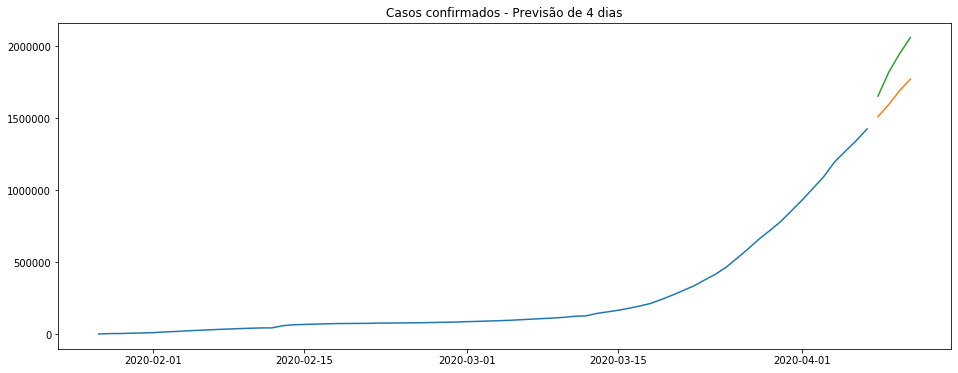

In [53]:
plt.figure(figsize=(16, 6))
plt.title('Casos confirmados - Previsão de {} dias'.format(len(y_teste_confir)))
plt.plot(y_treino_confir)
plt.plot(y_teste_confir)
plt.plot(df_previsao_confir)
plt.show()

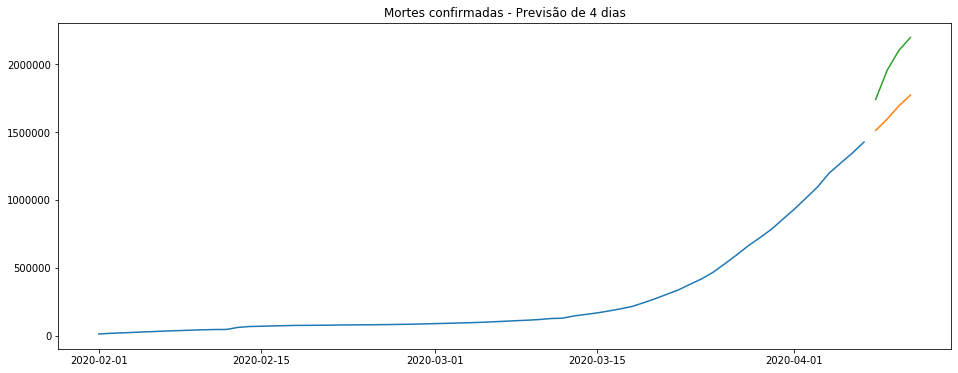

In [54]:
plt.figure(figsize=(16, 6))
plt.title('Mortes confirmadas - Previsão de {} dias'.format(len(y_teste_mort)))
plt.plot(y_treino_mort)
plt.plot(y_teste_mort)
plt.plot(df_previsao_mort)
plt.show()

In [56]:
#plt.figure(figsize=(16, 6))
#plt.title('Casos recuperados - Previsão de {} dias'.format(len(y_teste_recup)))
#plt.plot(y_treino_recup)
#plt.plot(y_teste_recup)
#plt.plot(df_previsao_recup)
#plt.show()

## 8. Executando testes através do tempo (?)

In [58]:
# ???

## 9. Analisar Distância Percorrida pelo Virus em cada dia Zero (?)

In [59]:
# ???

## 10. Correlacionar Casos vs Mortes vs Recuperados

## 11. Visualizar em Gráfico Animado (?)

In [60]:
# ???

## 12. Gráfico Animado no MapaMundi (?)
- Gostei da idéia do Panel que usa Bokeh e Ipython Widghet para animar mapas

In [61]:
# ???